In [1]:
from __future__ import print_function

%matplotlib inline
import numpy
import matplotlib.pyplot as plt

In [16]:
def vector_field(gamma,d,c,theta,f,b_max,w_max,num_b=20,num_w=20):
    b_field = numpy.linspace(0,b_max,num_b)
    w_field = numpy.linspace(0,w_max,num_w)
    b_vector = numpy.zeros([num_b,num_w])
    w_vector = numpy.zeros([num_b,num_w])
    for w_lupe in range(w_field.shape[0]):
        for b_lupe in range(b_field.shape[0]):
            w = w_field[w_lupe]
            b = b_field[b_lupe]
            b_vector[w_lupe][b_lupe] = (f*theta/(1.0+theta)+1)*b*(1-b)-theta*w*b/(c+b)
            w_vector[w_lupe][b_lupe] = -d*w + gamma*theta*w*b/(c+b)
            length = numpy.sqrt(b_vector[w_lupe][b_lupe]*b_vector[w_lupe][b_lupe]+
                                w_vector[w_lupe][b_lupe]*w_vector[w_lupe][b_lupe])
            if(numpy.fabs(length)>1e-5):
                b_vector[w_lupe][b_lupe] /= length
                w_vector[w_lupe][b_lupe] /= length

    return([b_field,w_field,b_vector,w_vector])



In [22]:

def plot_phase(gamma,d,c,theta,f,b_max=2,w_max=2):
    b_plot = numpy.linspace(0,b_max,100)
    w_plot = numpy.linspace(0,w_max,100)

    b_nullcline_one = numpy.array([b_plot,(f*theta/(1.0+theta)+1)*(1.0-b_plot)*(c+b_plot)/theta])
    b_nullcline_two = numpy.array([[0.0,0.0],[0.0,w_max]])

    w_nullcline_one = numpy.array([[c/(theta*gamma/d-1),c/(theta*gamma/d-1)],[0.0,w_max]])
    w_nullcline_two = numpy.array([[0.0,b_max],[0.0,0.0]])

    [b_field,w_field,b_vector,w_vector] = vector_field(gamma,d,c,theta,f,b_max,w_max,20,20)

    fig = plt.figure()
    axes = fig.add_subplot(1, 1, 1)

    axes.set_xlabel("b")
    axes.set_ylabel("w")
    axes.set_title("b/w phase plane, $\\theta$={0}".format(theta))
    #axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
    axes.set_xlim(-0.1, b_max)
    axes.set_ylim(-0.1, w_max)

    axes.plot(b_nullcline_one[0],b_nullcline_one[1],'r')
    axes.plot(b_nullcline_two[0],b_nullcline_two[1],'r')

    axes.plot(w_nullcline_one[0],w_nullcline_one[1],'b')
    axes.plot(w_nullcline_two[0],w_nullcline_two[1],'b')

    axes.quiver(b_field,w_field,b_vector,w_vector)

    plt.show()
    return([plt,axes])


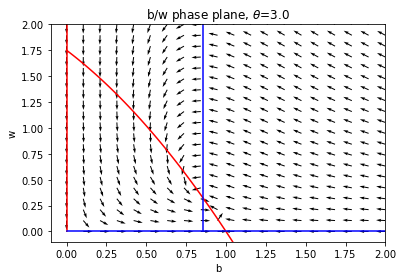

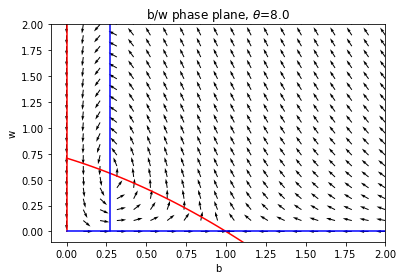

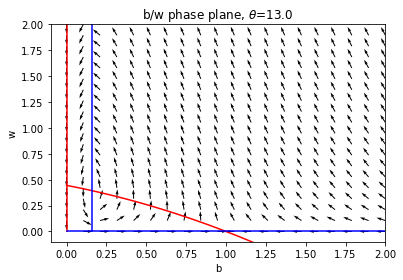

In [23]:
gamma = 3.0
d     = 2.0
c     = 3.0
theta = 3.0
f     = 1.0

[plt1,axes1] = plot_phase(gamma,d,c,theta,f)
[plt2,axes2] = plot_phase(gamma,d,c,theta+5.0,f)
[plt3,axes3] = plot_phase(gamma,d,c,theta+10.0,f)

